In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
import tensorflow as tf

2023-06-08 17:20:16.361333: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-08 17:20:16.410666: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-08 17:20:16.683135: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-08 17:20:16.684145: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-08 17:20:17.895945: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [3]:
from tensorflow.keras.callbacks import TensorBoard
import time

In [4]:
NAME = "TL_taks-{}".format(time.time())

In [5]:
tensorboard = TensorBoard(log_dir = "log_dir/{}".format(NAME))

In [6]:
df = pd.read_csv("./label.csv")
df

,image_name,label
0,1.png,1
1,2.png,1
2,3.png,1
3,4.png,1
4,5.png,1
...,...,...
63440,63441.png,5
63441,63442.png,5
63442,63443.png,5
63443,63444.png,5


In [7]:
dataset = []
shapes = []

IMG_SIZE = 64

for i in range(df.shape[0]):
    img = cv2.imread("./cells/cells/" + df["image_name"][i], cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    dataset.append(img)
    shapes.append(img.shape)
# test_image.reshape(test_image.size)

In [8]:
shapes = np.array(shapes)

In [9]:
dataset = np.array(dataset)

In [10]:
dataset = tf.keras.utils.normalize(dataset)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(dataset, np.array(df['label']), test_size=0.2, shuffle = True)
del dataset, df

In [13]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1]*X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1]*X_test.shape[2]))

X_train.shape

(50756, 4096)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [15]:
diction = {
    1:1,
    2:2,
    3:3,
    4:4,
    5:5,
    6:0
}

y_train = np.array([diction[i] for i in y_train])
y_test = np.array([diction[i] for i in y_test])

In [16]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [17]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.fit(X_train, y_train, epochs=15, callbacks=[tensorboard])

Epoch 1/15
1587/1587 [==============================] - 6s 3ms/step - loss: 1.1996 - accuracy: 0.4837
Epoch 2/15
1587/1587 [==============================] - 5s 3ms/step - loss: 1.0660 - accuracy: 0.5460
Epoch 3/15
1587/1587 [==============================] - 6s 3ms/step - loss: 1.0404 - accuracy: 0.5586
Epoch 4/15
1587/1587 [==============================] - 5s 3ms/step - loss: 1.0184 - accuracy: 0.5669
Epoch 5/15
1587/1587 [==============================] - 4s 3ms/step - loss: 1.0022 - accuracy: 0.5757
Epoch 6/15
1587/1587 [==============================] - 5s 3ms/step - loss: 0.9883 - accuracy: 0.5820
Epoch 7/15
1587/1587 [==============================] - 4s 3ms/step - loss: 0.9766 - accuracy: 0.5865
Epoch 8/15
1587/1587 [==============================] - 5s 3ms/step - loss: 0.9700 - accuracy: 0.5892
Epoch 9/15
1587/1587 [==============================] - 5s 3ms/step - loss: 0.9626 - accuracy: 0.5927
Epoch 10/15
1587/1587 [==============================] - 6s 3ms/step - loss: 0.952

In [20]:
loss, accuracy = model.evaluate(X_test, y_test)

397/397 [==============================] - 1s 1ms/step - loss: 0.9113 - accuracy: 0.6246


In [21]:
y_pred = model.predict(X_test).argmax(axis = 1)

397/397 [==============================] - 1s 1ms/step


In [22]:
y_tests =np.sum(y_test, axis=0)
y_tests

array([ 475., 2960., 2824., 2671., 2702., 1057.], dtype=float32)

In [23]:
uniques, counts = np.unique(y_pred, return_counts=True)
counts, uniques

(array([ 300, 3159, 3615, 2479, 2191,  945]), array([0, 1, 2, 3, 4, 5]))

In [24]:
y_test = y_test.argmax(axis = 1)
y_test

array([5, 4, 4, ..., 4, 1, 0])

In [25]:
label_list = ['6', '1', '2', '3', '4', '5']

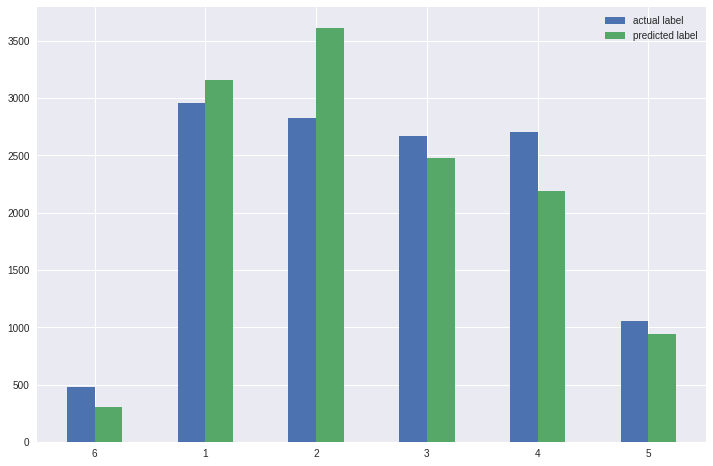

In [26]:
plt.style.use('seaborn')
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

x1 = [x-barWidth/2 for x in uniques]
x2 = [x + barWidth for x in x1]

plt.bar(x1,y_tests, width=barWidth, label = 'actual label')
plt.bar(x2,counts, width= barWidth, label = 'predicted label')
plt.xticks(uniques, label_list)
plt.legend()
plt.show()

In [27]:
err = abs(y_tests - counts)

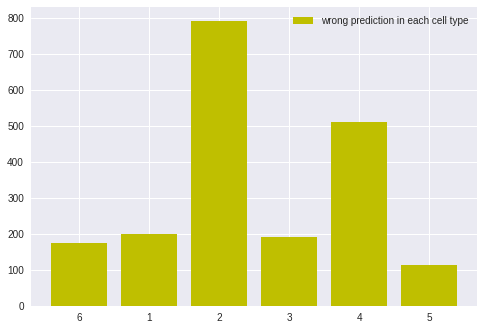

In [28]:
plt.bar(uniques, err, label = 'wrong prediction in each cell type', color = 'y')
plt.xticks(uniques, label_list)
plt.legend()
plt.show()

In [29]:
from sklearn.metrics import f1_score, confusion_matrix

In [30]:
f1 = f1_score(y_true=y_test, y_pred=y_pred ,average='weighted')
f1

0.6262371764804782

In [31]:
cm = confusion_matrix(y_test, y_pred, normalize= 'pred')

In [32]:
hm =pd.DataFrame(cm.round(2))

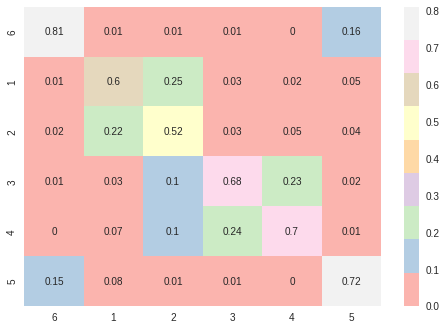

This plot shows what each type of cell is being predicted to.
The high values other than the diagonal represent that the cell is predicted wrongly.


In [38]:
import seaborn as sns
sns.heatmap(hm,annot=True, cmap = 'Pastel1')
plt.xticks(uniques+0.5, label_list)
plt.yticks(uniques+0.5, label_list)
plt.show()
print("This plot shows what each type of cell is being predicted to.")
print("The high values other than the diagonal represent that the cell is predicted wrongly.")

The below data is retrieved from Tensorboard Callback

Go to the treminal and type
`tensorboard --logdir=log_dir`

Go to http://localhost:6006/ to see the realtime plot when the model is being trained

In [36]:
acc = pd.read_csv("./Acc.csv")
loss = pd.read_csv("./Loss.csv")
loss

,Wall time,Step,Value
0,1.686225e+09,0,1.199620
1,1.686225e+09,1,1.066035
2,1.686225e+09,2,1.040437
3,1.686225e+09,3,1.018380
4,1.686225e+09,4,1.002187
5,1.686225e+09,5,0.988313
6,1.686225e+09,6,0.976582
7,1.686225e+09,7,0.970036
8,1.686225e+09,8,0.962638
9,1.686225e+09,9,0.952158


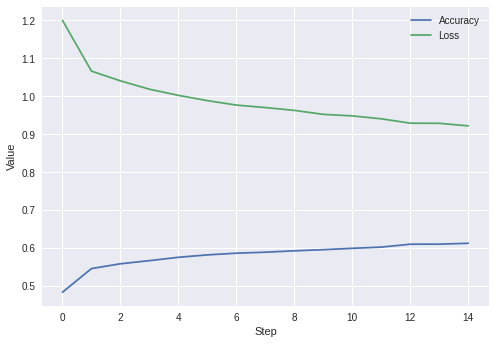

In [37]:
sns.lineplot(data=acc, x = "Step", y = 'Value', label = 'Accuracy')
# plt.show()
sns.lineplot(data = loss, x = "Step", y = 'Value', label = 'Loss')
plt.legend()
plt.show()